# Exploratory Data Analysis for UofT Nodes Dataset

In [15]:
#!pip install libraries
#!pip install seaborn
#!pip install bioinfokit
#!pip install statsmodels
#!pip install scikit_posthocs
#!pip install pingouin

In [13]:
#Libraries 
import pandas as nodes 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

from sklearn.linear_model import LinearRegression

import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

import scipy
from scipy import stats

from bioinfokit.analys import stat


# Getting to Know Dataset

Importing and checking columns, rows, datatype, and dimension.

In [14]:
#Import csv file as pandas dataframe
nodes = nodes.read_csv('UofT_nodes.csv')
nodes.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0


In [16]:
#Exploring data characteristics
nodes.describe()

,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,CUSTOMER_ID
count,993616.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06
mean,381.329028,0.985686,0.98855,0.097489,15062.980362,8.596567,23353.115677,23.146121,3.411956e+06,85.394548,1.382649e+06,152.431128,5.003547e+05
std,302.806156,0.118782,0.10639,0.296623,20323.375203,8.426340,33337.695394,20.867079,5.754767e+06,66.773057,2.165856e+06,120.158287,2.888723e+05
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,89.000000,1.000000,1.00000,0.000000,2575.721000,3.000000,3419.478250,8.000000,1.209508e+05,33.000000,1.053308e+05,59.000000,2.501808e+05
50%,354.000000,1.000000,1.00000,0.000000,5983.672500,6.000000,8001.721500,17.000000,2.981515e+05,71.000000,2.550340e+05,126.000000,5.003765e+05
75%,724.000000,1.000000,1.00000,0.000000,19206.000000,11.000000,29862.000000,32.000000,4.688108e+06,122.000000,1.926422e+06,218.000000,7.505282e+05
max,840.000000,1.000000,1.00000,1.000000,188953.000000,79.000000,310117.000000,203.000000,4.781359e+07,605.000000,1.893074e+07,1083.000000,1.000677e+06


In [17]:
for col in nodes.columns: 
    print(col) 

BIRTH_DT
CUST_ADD_DT
OCPTN_NM
RES_CNTRY_CA
CNTRY_OF_INCOME_CA
PEP_FL
CASH_SUM_IN
CASH_CNT_IN
CASH_SUM_OUT
CASH_CNT_OUT
WIRES_SUM_IN
WIRES_CNT_IN
WIRES_SUM_OUT
WIRES_CNT_OUT
COUNTRY_RISK_INCOME
COUNTRY_RISK_RESIDENCY
RISK
NAME
GENDER
CUSTOMER_ID


In [18]:
#Checking data types in dataframe
col_types = nodes.dtypes
col_types

BIRTH_DT                   object
CUST_ADD_DT                object
OCPTN_NM                  float64
RES_CNTRY_CA                int64
CNTRY_OF_INCOME_CA          int64
PEP_FL                    float64
CASH_SUM_IN               float64
CASH_CNT_IN               float64
CASH_SUM_OUT              float64
CASH_CNT_OUT              float64
WIRES_SUM_IN              float64
WIRES_CNT_IN              float64
WIRES_SUM_OUT             float64
WIRES_CNT_OUT             float64
COUNTRY_RISK_INCOME        object
COUNTRY_RISK_RESIDENCY     object
RISK                       object
NAME                       object
GENDER                     object
CUSTOMER_ID               float64
dtype: object

In [19]:
#Checking dimensions of the dataframe
dims = nodes.shape
dims

(1000000, 20)

In [33]:
#Unique value counts for Occuptations
Occupations_freqs = nodes['OCPTN_NM'].value_counts()
Occupations_freqs

25.0     185293
724.0    147064
89.0     135796
513.0    124901
817.0    100147
          ...  
703.0         1
295.0         1
628.0         1
824.0         1
184.0         1
Name: OCPTN_NM, Length: 682, dtype: int64

In [35]:
#Unique value counts for Country Risk Income
Country_Risk_I_freqs = nodes['COUNTRY_RISK_INCOME'].value_counts()
Country_Risk_I_freqs

Low         996546
High          2841
Moderate       613
Name: COUNTRY_RISK_INCOME, dtype: int64

In [36]:
#Unique value counts for Country Risk Residency
Country_Risk_R_freqs = nodes['COUNTRY_RISK_RESIDENCY'].value_counts()
Country_Risk_R_freqs

Low         990109
High          9200
Moderate       691
Name: COUNTRY_RISK_RESIDENCY, dtype: int64

In [37]:
#Unique value counts for Risk
Risk_freqs = nodes['RISK'].value_counts()
Risk_freqs

low       600000
medium    350000
high       50000
Name: RISK, dtype: int64

# Data Cleaning

Cleaning nodes dataset using tidy data principles.

In [58]:
#Check for duplicates of the same values across attributes listed
dups = nodes.duplicated(['BIRTH_DT', 'NAME'])
nodes[dups]

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
298347,1993-02-22,1996-02-09,92.0,1,1,0.0,10361.085,14.0,4943.843,20.0,248820.0,88.0,128792.0,122.0,Low,Low,low,NaN,NaN,787495.0
517769,1988-03-01,2018-05-19,817.0,1,1,0.0,7249.498,10.0,1034.838,3.0,48495.0,5.0,22074.0,22.0,Low,Low,low,NaN,NaN,612668.0
535470,1979-03-04,2009-01-16,817.0,1,1,0.0,3276.967,4.0,4772.063,8.0,147009.0,64.0,85317.0,81.0,Low,Low,low,NaN,NaN,290261.0
562775,1964-07-31,1996-11-14,817.0,1,1,0.0,2023.710,2.0,5054.946,15.0,264646.0,172.0,115679.0,172.0,Low,Low,low,NaN,NaN,83788.0
681529,1960-05-05,1995-06-09,513.0,1,1,1.0,22193.000,6.0,49632.000,18.0,22489468.0,218.0,6012229.0,367.0,Low,Low,medium,NaN,NaN,308099.0
687055,1959-04-30,2001-07-25,513.0,1,1,1.0,45889.000,22.0,5899.000,3.0,13426355.0,92.0,1351244.0,88.0,Low,Low,medium,NaN,NaN,940336.0
699734,1951-11-20,2011-04-24,513.0,1,1,0.0,81695.000,33.0,54093.000,58.0,10578615.0,54.0,6712032.0,291.0,Low,Low,medium,NaN,NaN,684309.0
726253,1981-12-27,2021-06-09,513.0,1,1,0.0,22637.963,16.0,60610.000,60.0,3874046.0,96.0,1296826.0,123.0,Low,Low,high,NaN,NaN,919464.0
813359,1983-05-24,2013-05-11,344.0,1,1,0.0,11660.122,14.0,7107.114,25.0,111079.0,40.0,262727.0,258.0,Low,Low,low,NaN,NaN,986478.0
824323,1974-08-19,1995-03-23,840.0,1,1,1.0,23644.000,17.0,1824.000,3.0,3590813.0,106.0,1166247.0,43.0,Low,Low,medium,NaN,NaN,337791.0


In [48]:
nodes.isnull().values.any().sum()

1

In [59]:
#Calculate the number of missing values in each column:
nodes.isnull().sum()

BIRTH_DT                     0
CUST_ADD_DT               4178
OCPTN_NM                  6384
RES_CNTRY_CA                 0
CNTRY_OF_INCOME_CA           0
PEP_FL                       0
CASH_SUM_IN                  0
CASH_CNT_IN                  0
CASH_SUM_OUT                 0
CASH_CNT_OUT                 0
WIRES_SUM_IN                 0
WIRES_CNT_IN                 0
WIRES_SUM_OUT                0
WIRES_CNT_OUT                0
COUNTRY_RISK_INCOME          0
COUNTRY_RISK_RESIDENCY       0
RISK                         0
NAME                       660
GENDER                     628
CUSTOMER_ID                  0
dtype: int64

<AxesSubplot:>

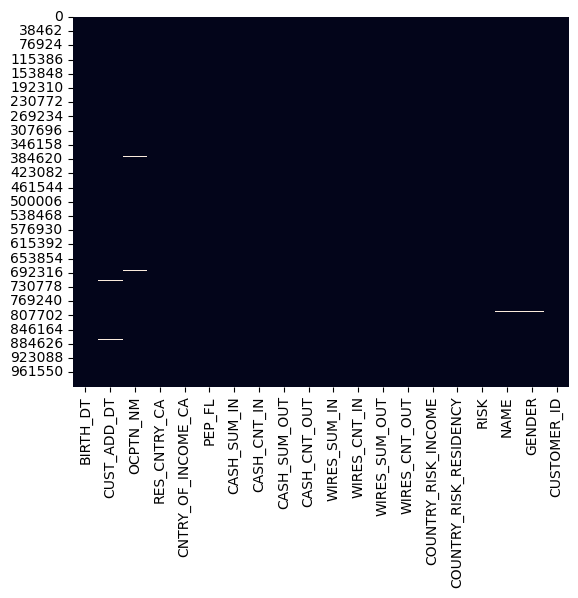

In [62]:
#Use a heatmap to visualize missing data
sns.heatmap(nodes.isnull(), cbar=False)

In [63]:
nodes.dropna()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0


In [65]:
#Exporting cleaned data
#iabetes = nodes.drop(['log_Age', 'log_Insulin'], axis=1)
nodes.to_csv("UofT_nodes_cleaned.csv", index=False)

# One Hot Encoding

In [91]:
pd.get_dummies(nodes, columns=['GENDER'])
nodes.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0


In [94]:
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'COUNTRY_RISK_INCOME' column 
encoder_nodes = pd.DataFrame(encoder.fit_transform(nodes[['COUNTRY_RISK_INCOME']]).toarray())
#merge one-hot encoded columns back with original DataFrame
final_nodes = nodes.join(encoder_nodes)
#drop 'COUNTRY_RISK_INCOME'' column
final_nodes.drop('COUNTRY_RISK_INCOME', axis=1, inplace=True)
#rename columns
final_nodes.columns = ['Low', 'Medium', 'High']
#view final nodes
print(final_nodes)

ValueError: Length mismatch: Expected axis has 22 elements, new values have 3 elements

# Correlations

In [66]:
#Overview of all correlations between all pairs of numerical columns
nodes.corr()

,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,CUSTOMER_ID
OCPTN_NM,1.000000,0.033096,0.005180,-0.054500,-0.103790,-0.073853,-0.109895,-0.060444,-0.134128,-0.011593,-0.141621,-0.022403,0.000428
RES_CNTRY_CA,0.033096,1.000000,0.029049,-0.026723,-0.063550,-0.039347,-0.054083,-0.015968,-0.066683,0.037485,-0.075422,0.021660,-0.001143
CNTRY_OF_INCOME_CA,0.005180,0.029049,1.000000,-0.007470,-0.015280,-0.010457,-0.008478,-0.001588,-0.008690,0.009957,-0.010397,0.005815,0.001191
PEP_FL,-0.054500,-0.026723,-0.007470,1.000000,0.199309,0.143242,0.226687,0.162801,0.204057,0.103780,0.197912,0.080394,-0.001315
CASH_SUM_IN,-0.103790,-0.063550,-0.015280,0.199309,1.000000,0.915346,0.586298,0.469528,0.473499,0.255888,0.499819,0.316364,0.000093
CASH_CNT_IN,-0.073853,-0.039347,-0.010457,0.143242,0.915346,1.000000,0.512216,0.475869,0.362159,0.275431,0.395442,0.357508,0.000630
CASH_SUM_OUT,-0.109895,-0.054083,-0.008478,0.226687,0.586298,0.512216,1.000000,0.851496,0.623890,0.375184,0.628060,0.421984,-0.000088
CASH_CNT_OUT,-0.060444,-0.015968,-0.001588,0.162801,0.469528,0.475869,0.851496,1.000000,0.447223,0.479200,0.467904,0.547312,-0.000459
WIRES_SUM_IN,-0.134128,-0.066683,-0.008690,0.204057,0.473499,0.362159,0.623890,0.447223,1.000000,0.404182,0.864838,0.336000,-0.000155
WIRES_CNT_IN,-0.011593,0.037485,0.009957,0.103780,0.255888,0.275431,0.375184,0.479200,0.404182,1.000000,0.333209,0.674894,-0.001296


In [67]:
nodes.corr().style.background_gradient(cmap="Blues")

,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,CUSTOMER_ID
OCPTN_NM,1.000000,0.033096,0.005180,-0.054500,-0.103790,-0.073853,-0.109895,-0.060444,-0.134128,-0.011593,-0.141621,-0.022403,0.000428
RES_CNTRY_CA,0.033096,1.000000,0.029049,-0.026723,-0.063550,-0.039347,-0.054083,-0.015968,-0.066683,0.037485,-0.075422,0.021660,-0.001143
CNTRY_OF_INCOME_CA,0.005180,0.029049,1.000000,-0.007470,-0.015280,-0.010457,-0.008478,-0.001588,-0.008690,0.009957,-0.010397,0.005815,0.001191
PEP_FL,-0.054500,-0.026723,-0.007470,1.000000,0.199309,0.143242,0.226687,0.162801,0.204057,0.103780,0.197912,0.080394,-0.001315
CASH_SUM_IN,-0.103790,-0.063550,-0.015280,0.199309,1.000000,0.915346,0.586298,0.469528,0.473499,0.255888,0.499819,0.316364,0.000093
CASH_CNT_IN,-0.073853,-0.039347,-0.010457,0.143242,0.915346,1.000000,0.512216,0.475869,0.362159,0.275431,0.395442,0.357508,0.000630
CASH_SUM_OUT,-0.109895,-0.054083,-0.008478,0.226687,0.586298,0.512216,1.000000,0.851496,0.623890,0.375184,0.628060,0.421984,-0.000088
CASH_CNT_OUT,-0.060444,-0.015968,-0.001588,0.162801,0.469528,0.475869,0.851496,1.000000,0.447223,0.479200,0.467904,0.547312,-0.000459
WIRES_SUM_IN,-0.134128,-0.066683,-0.008690,0.204057,0.473499,0.362159,0.623890,0.447223,1.000000,0.404182,0.864838,0.336000,-0.000155
WIRES_CNT_IN,-0.011593,0.037485,0.009957,0.103780,0.255888,0.275431,0.375184,0.479200,0.404182,1.000000,0.333209,0.674894,-0.001296
